In [1]:
import sympy as sp
import gEconpy as ge
import gEconpy.plotting as gp

In [2]:
mod = ge.model_from_gcn("../GCN Files/RBC_two_household_additive.gcn")

Model Building Complete.
Found:
	16 equations
	16 variables
	The following variables were eliminated at user request:
		TC_t,U_NR_t,U_R_t
	The following "variables" were defined as constants and have been substituted away:
		mc_t
	2 stochastic shocks
		 0 / 2 has a defined prior. 
	10 parameters
		 0 / 10 has a defined prior. 
	0 parameters to calibrate.
Model appears well defined and ready to proceed to solving.



In [3]:
mod.equations

[rho_beta_R*log(shock_beta_R_t-1) + epsilon_beta_R_t - log(shock_beta_R_t),
 I_t - K_t + K_t-1*(1 - delta),
 -lambda_R_t + shock_beta_R_t/C_R_t**sigma_R,
 -Theta_R*shock_beta_R_t + lambda_R_t*w_t,
 -lambda_R_t + q_t,
 beta*(lambda_R_t+1*r_t+1 - q_t+1*(delta - 1)) - q_t,
 -C_NR_t + L_NR_t*w_t,
 -lambda_NR_t + C_NR_t**(-sigma_N),
 -Theta_N + lambda_NR_t*w_t,
 rho_TFP*log(TFP_t-1) + epsilon_TFP_t - log(TFP_t),
 K_t-1**alpha*L_t**(1 - alpha)*TFP_t - Y_t,
 alpha*K_t-1**(alpha - 1)*L_t**(1 - alpha)*TFP_t - r_t,
 TFP_t*(K_t-1/L_t)**alpha*(1 - alpha) - w_t,
 C_t + I_t - Y_t,
 omega*L_R_t + L_NR_t*(1 - omega) - L_t,
 omega*C_R_t + C_NR_t*(1 - omega) - C_t]

In [4]:
ss_res = mod.steady_state()
A, B, C, D = mod.linearize_model(steady_state=ss_res)

In [5]:
ss_res

{'C_ss': 1.8103313609185514,
 'C_NR_ss': 1.8103313609185514,
 'C_R_ss': 1.8103313609185514,
 'I_ss': 0.5485612737719945,
 'K_ss': 27.42806368859972,
 'L_ss': 0.6294835982484689,
 'L_NR_ss': 0.7432261172918171,
 'L_R_ss': 0.5157410792051207,
 'TFP_ss': 1.0,
 'Y_ss': 2.358892634690546,
 'lambda_NR_ss': 0.4105470044526591,
 'lambda_R_ss': 0.4105470044526591,
 'q_ss': 0.4105470044526591,
 'r_ss': 0.030101010101010184,
 'shock_beta_R_ss': 1.0,
 'w_ss': 2.4357746839078733}

In [6]:
ge.bk_condition(mod, steady_state=ss_res);

Model solution has 3 eigenvalues greater than one in modulus and 3 forward-looking variables. 
Blanchard-Kahn condition is satisfied.


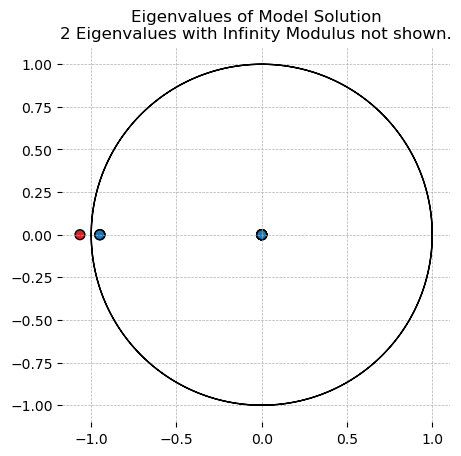

In [7]:
gp.plot_eigenvalues(mod, A=A, B=B, C=C, D=D);

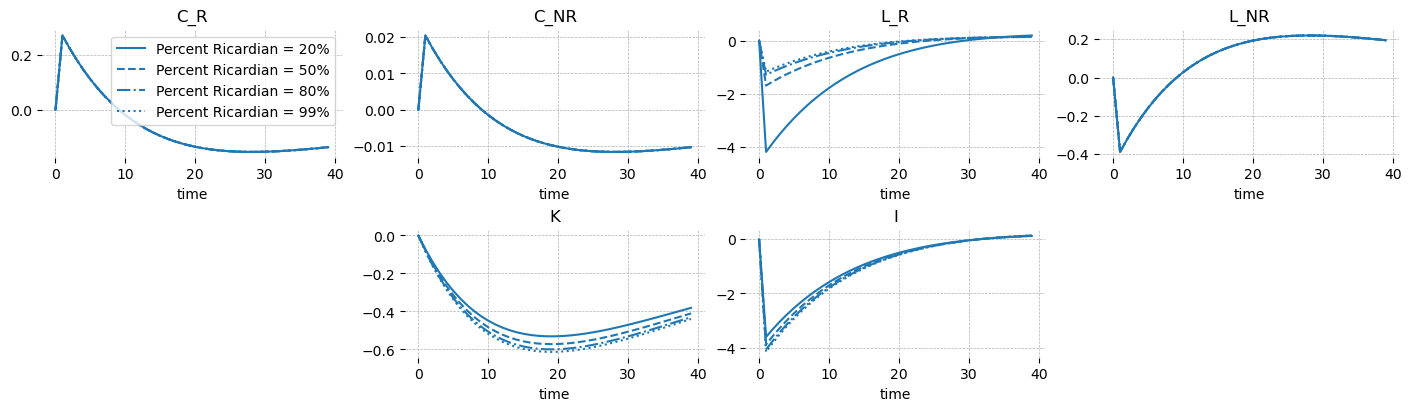

In [8]:
gp.plot_irf(
    {
        f"Percent Ricardian = {omega:0.0%}": ge.impulse_response_function(
            mod,
            shock_size={"epsilon_beta_R": 1.0},
            verbose=False,
            omega=omega,
            sigma_N=20.0,
            Theta_N=10.0,
        )
        for omega in [0.2, 0.5, 0.8, 0.99]
    },
    ["C_R", "C_NR", "L_R", "L_NR", "K", "I"],
    figsize=(14, 4),
);

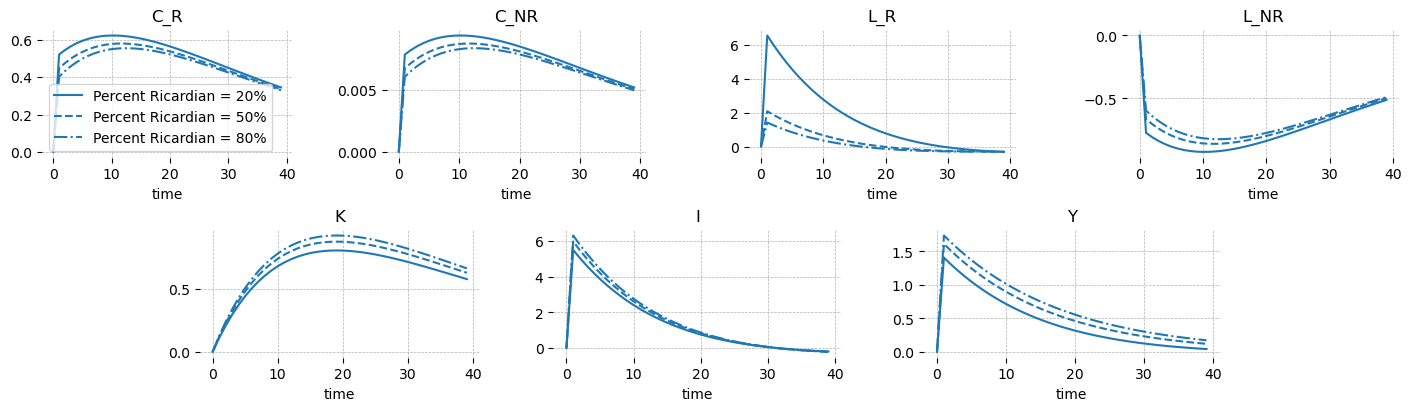

In [9]:
gp.plot_irf(
    {
        f"Percent Ricardian = {omega:0.0%}": ge.impulse_response_function(
            mod,
            shock_size={"epsilon_TFP": 1.0},
            verbose=False,
            omega=omega,
            sigma_N=100.0,
            Theta_N=10.0,
        )
        for omega in [0.2, 0.5, 0.8]
    },
    ["C_R", "C_NR", "L_R", "L_NR", "K", "I", "Y"],
    figsize=(14, 4),
);